# ML Clustering - Network Intrusion Detection
## Part 2 - DATA PREPROCESSING

### 1. INITIALIZATION

In [14]:
# Import necessary libraries and modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [15]:
# Set display options
pd.set_option('display.max_columns', None)

### 2. LOADING DATASET

In [16]:
# Initialize required variables to read the cleaned data file
data_file_location = "..\\data\\interim\\"
data_file_name = "kddcup99_cleaned"
data_file_ext = ".csv"

# Read the dataset
data = pd.read_csv(data_file_location + data_file_name + data_file_ext, index_col=0)

### 3. EXPLORING DATASET

In [17]:
# Get a general overview of the column types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976158 entries, 0 to 976157
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     976158 non-null  int64  
 1   protocol_type                976158 non-null  object 
 2   service                      976158 non-null  object 
 3   flag                         976158 non-null  object 
 4   src_bytes                    976158 non-null  int64  
 5   dst_bytes                    976158 non-null  int64  
 6   land                         976158 non-null  int64  
 7   wrong_fragment               976158 non-null  int64  
 8   urgent                       976158 non-null  int64  
 9   hot                          976158 non-null  int64  
 10  num_failed_logins            976158 non-null  int64  
 11  logged_in                    976158 non-null  int64  
 12  num_compromised              976158 non-null  int64  
 13 

From the information provided by info() function we observe the following:
- The majority of data fields are numerical.
- Only 4 out of the 41 columns are categorical (including the label class).
- The dataset is originally labeled, and the attribute "labels" represents the classification of each sample. This attribute won't be used during the analysis but we will rely on it later on as a "ground truth" to evaluate the clustering results.

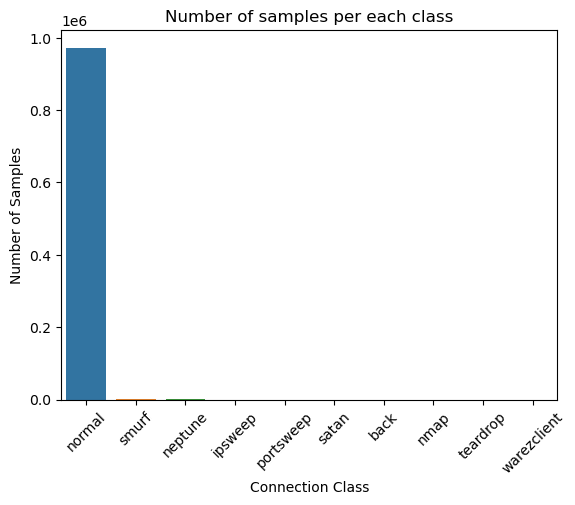

In [18]:
# Check class distribution of all connection samples
count_plot = sns.countplot(data=data, x="labels",  order=data["labels"].value_counts().index)
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45)
plt.title("Number of samples per each class")
plt.xlabel("Connection Class")
plt.ylabel("Number of Samples")
plt.show()

- As the chart clearly shows, the dataset is not equally distributed and the majority of samples are of normal classification. This is quite expected since we are using the "SA" version of the KDD Cup '99 dataset which is particularity curated for unsupervised analysis.
- In this version of the dataset, we have 9 different classes being one of them normal and the other 8 are malicious.

### 4. ENCODING CATEGORICAL FEATURES

The data set includes three categorical features, that need to be converted into a numerical representation so that they are acceptable to data analysis and prediction algorithms.

In [19]:
# Check the unique values of categorical features
categorical_features = ["protocol_type", "service", "flag"]
for c in categorical_features:
    print(f"Feature {c} has {data[c].nunique()} unique values.")

Feature protocol_type has 3 unique values.
Feature service has 49 unique values.
Feature flag has 10 unique values.


- We have two features with relatively limited number of unique values, however, the "service" attribute alone spans across 49 different values. 
- The high number of unique values might be challenging to be converted since it may contribute to substantially expanding the data set dimensions (specifically in the case of one-hot encoding which we will use later on in this section).
- A suitable approach to overcome this issue is to combine less frequent values together into a single alternative one called "other".

In [20]:
# Check the distribution of the 10 most frequent values in the "service" attribute
data["service"].value_counts(normalize=True).head(10)

http        0.634170
smtp        0.097701
private     0.076564
domain_u    0.059184
other       0.057909
ftp_data    0.039024
ecr_i       0.006020
urp_i       0.005506
finger      0.005142
ntp_u       0.003927
Name: service, dtype: float64

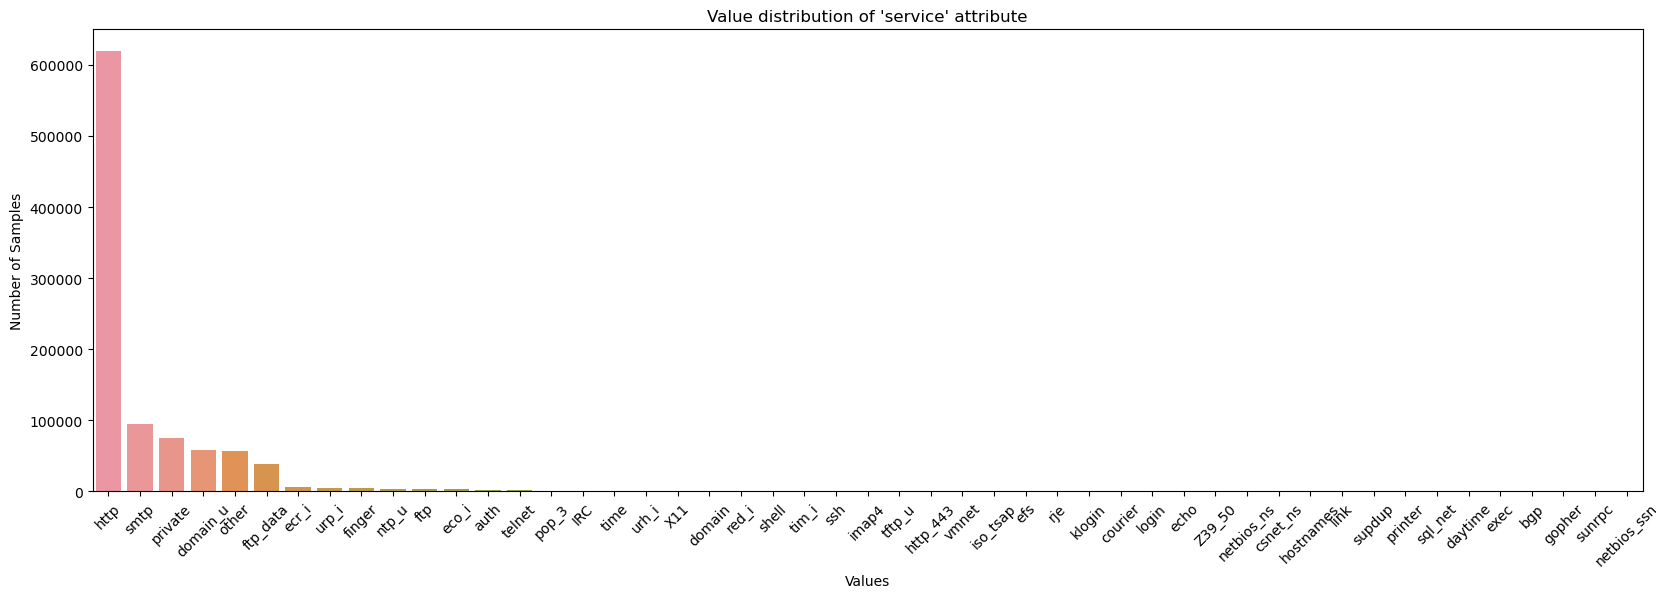

In [21]:
# Plot the value distribution of "service" attribute
plt.figure(figsize=(20,6))
service_plot = sns.countplot(data=data, x="service", order=data["service"].value_counts().index)
service_plot.set_xticklabels(service_plot.get_xticklabels(), rotation=45)
plt.title("Value distribution of 'service' attribute")
plt.xlabel("Values")
plt.ylabel("Number of Samples")
plt.show()

- The value distribution of "service" attribute revealed that the majority of data samples belong to a limited set of values, namely 6 unique ones. While remaining minority samples span across the other 43 possible values. 
- This indicates a possibility to combine less frequent values into a single (combined) one.
- Since there are already samples withe "service" equals "other", we will combine the rarely occurring values into a new label called "combined", to avoid creating a bias towards the original "Other" samples.

#### Combine Less-Frequent Values

In [22]:
# Combine less frequent "service" values into "Combined"
service_freq_vals = list(data["service"].value_counts().head(6).index)
data["service"] = data["service"].apply(lambda x: x if x in service_freq_vals else "combined")

In [23]:
# Check value distribution after combining rare values
data["service"].value_counts(normalize=True)

http        0.634170
smtp        0.097701
private     0.076564
domain_u    0.059184
other       0.057909
ftp_data    0.039024
combined    0.035447
Name: service, dtype: float64

As a result, a new label was created to aggregate all rare values and the vector of "service" values has been decreased from 49 possible values down to only 7 unique ones, which accounts for better conditions to apply one-hot encoding.

#### One-Hot Encoding

Since there is no implicit order among the individual values of categorical attributes, we will use the One-Hot Encoding mechanism to transfer each value into a vector of 1 and 0s, representing the absence/presence of this certain value in each sample.

In [24]:
# Initialize the encoder with its default parameters
ohe = OneHotEncoder()

# Fit the encoder to categorical features in the dataset
encoded_features = ohe.fit_transform(data[categorical_features])

# Create a DataFrame of encoded features
encoded_features_df = pd.DataFrame(encoded_features.toarray(), columns=ohe.get_feature_names_out())

# Check encoding results 
encoded_features_df

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_combined,service_domain_u,service_ftp_data,service_http,service_other,service_private,service_smtp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976153,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
976154,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
976155,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
976156,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


As shown in this overview and with referring to the One-Hot Encoding algorithm, the total number of resulting columns is 20, which matches the sum of all distinct values of considered features (3+7+10=20)

In [25]:
# Merge encoded features with original dataset and drop categorical columns
data = pd.concat([data, encoded_features_df], axis=1).drop(categorical_features, axis=1)

In [26]:
# Check new dataset dimensions
data.shape

(976158, 58)

The dimensions of the dataset, namely columns number, has increased as a natural outcome of the encoding process. The new columns number is interpreted as follows:
- Loaded data set columns: 41
- New encoded columns: 20
- Dropped categorical columns: 3
- Final columns: 41 - 3 + 20 = 58

In [28]:
# Check data fields type
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976158 entries, 0 to 976157
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     976158 non-null  int64  
 1   src_bytes                    976158 non-null  int64  
 2   dst_bytes                    976158 non-null  int64  
 3   land                         976158 non-null  int64  
 4   wrong_fragment               976158 non-null  int64  
 5   urgent                       976158 non-null  int64  
 6   hot                          976158 non-null  int64  
 7   num_failed_logins            976158 non-null  int64  
 8   logged_in                    976158 non-null  int64  
 9   num_compromised              976158 non-null  int64  
 10  root_shell                   976158 non-null  int64  
 11  su_attempted                 976158 non-null  int64  
 12  num_root                     976158 non-null  int64  
 13 

Now we have all columns are numerical except for one, the class label which will be ignored during the analysis step and reconsidered later for evaluation.

### 5. DATA NORMALIZATION

Since the number of features in the original dataset was relatively high, and it has been further increased as a result of categorical features encoding, it might be useful to reduce the dimensionality of the dataset.

To do so, we will apply the Principle Component Analysis (PCA) technique which is very common to solve such types of problems. However, since PCA implies implementing euclidean distance calculations, the features are supposed to be normalized to the same scale.

Regardless of PCA, data normalization is needed anyway since the KMeans clustering algorithm we are going to apply to group the data points also encompasses distance measuring and thus expects normalized dataset.

For this reason, we will apply a standard scaler to transfer each variable to a new value distribution so that the mean would be 0 and standard deviation is 1.

In [29]:
# Initiate StandardScaler with its default parameters
scaler = StandardScaler()

# Apply scaler to all features and store results in a new DataFrame
data_attributes = data.columns.drop("labels")
data[data_attributes] = scaler.fit_transform(data[data_attributes].values)

In [30]:
# Check the attribute distributions after scaling
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_combined,service_domain_u,service_ftp_data,service_http,service_other,service_private,service_smtp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05,9.761580e+05
mean,5.465053e-17,2.311074e-19,2.154576e-18,2.544001e-18,-1.109588e-18,7.833994e-19,-6.842234e-18,6.660260e-19,9.456841e-17,-1.665065e-19,-9.757463e-18,1.266541e-18,4.367384e-19,-2.649546e-18,2.427537e-18,1.991527e-17,-5.506998e-19,-4.454731e-18,-2.236100e-17,-2.049759e-17,-1.677075e-17,3.074638e-17,7.409266e-17,-3.948843e-17,2.261257e-15,4.480936e-17,-6.719948e-17,1.267124e-16,1.393487e-16,2.053253e-16,1.719293e-16,-6.195861e-17,-5.101104e-17,-1.304392e-17,3.726834e-18,-1.309050e-16,-1.520141e-16,-7.919522e-17,8.641596e-17,1.719002e-16,-2.142930e-17,-5.438848e-17,1.560612e-17,1.539648e-16,-1.141343e-17,2.123131e-16,8.105864e-17,-2.087245e-18,2.159671e-17,-3.137237e-18,5.532019e-18,1.770246e-17,3.432036e-18,-7.351762e-19,3.035332e-18,-2.091686e-16,7.142492e-20
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.608240e-01,-1.337356e-02,-9.432863e-02,-2.677876e-03,-1.012139e-03,-2.244964e-03,-5.306843e-02,-7.496676e-03,-1.590870e+00,-4.428869e-03,-1.759181e-02,-1.014425e-02,-7.339762e-03,-2.122207e-02,-1.891290e-02,-6.444960e-02,-1.431381e-03,-6.231571e-02,-3.077174e-01,-3.689512e-01,-5.793975e-02,-6.530177e-02,-2.442720e-01,-2.467636e-01,-1.014338e+01,-1.579488e-01,-4.785240e-01,-1.439333e+00,-2.319045e+00,-2.759518e+00,-3.135524e-01,-4.803934e-01,-4.788036e-01,-7.055470e-02,-5.728898e-02,-2.566173e-01,-2.554818e-01,-1.257552e-01,-1.930300e+00,-4.937805e-01,-1.917024e-01,-2.508130e-01,-2.015172e-01,-1.316628e+00,-2.479278e-01,-2.879455e-01,-3.290601e-01,-3.649342e-03,-2.411641e-01,-2.484118e-02,-1.872100e-02,-3.462640e-02,-2.326346e-02,-1.252044e-02,-6.864819e-03,-4.034152e+00,-1.753078e-03
25%,-1.608240e-01,-1.204094e-02,-9.046592e-02,-2.677876e-03,-1.012139e-03,-2.244964e-03,-5.306843e-02,-7.496676e-03,-1.590870e

As this statistical overview indicated, all attributes have been transformed so their standard deviations equals to 1 and means equals to 0 (very close to 0 due to limitations with numerical representation).

Having that said, the dataset is now preprocessed and ready for analysis.

### 6. STORE PROCESSED DATASET

In [31]:
# Set file location and name
data_file_location = "..\\data\\processed\\"
data_file_name = "kddcup99_processed"
data_file_ext = ".csv"

# Store processed dataset to a csv file
data.to_csv(data_file_location + data_file_name + data_file_ext)